# Módulo 2 Implementación de un modelo de deep learning
## Eduardo Rodríguez Gil - A01274913

Clasificador de los tipos de Pokemon de Agua y Fuego.

Estos sudos son para borrar las carpetas que creamos más adelante en único caso de que reiniciemos el entorno de ejecución, si no no es necesario correr esta parte.

In [ ]:
!sudo rm -rf train # sudo para eliminar la carpeta de train
!sudo rm -rf test # sudo para eliminar la carpeta de test
!sudo rm -rf val # sudo para eliminar la carpeta de val

Esta parte es para extraer todo lo que hay en la carpeta zip de "pokemon.zip", donde automaticamente nos generara una carpeta llamada "pokemon" que contiene aproximadamente 700 imagenes de todos los pokémon hasta la septima generación

In [1]:
!unzip pokemon.zip # Extrae las imagenes del zip

Archive:  pokemon.zip
   creating: pokemon/
  inflating: pokemon/441.png         
  inflating: pokemon/341.png         
  inflating: pokemon/686.png         
  inflating: pokemon/428.png         
  inflating: pokemon/387.png         
  inflating: pokemon/111.png         
  inflating: pokemon/331.png         
  inflating: pokemon/369.png         
  inflating: pokemon/344.png         
  inflating: pokemon/664.png         
  inflating: pokemon/121.png         
  inflating: pokemon/635.png         
  inflating: pokemon/580.png         
  inflating: pokemon/412-trash.png   
  inflating: pokemon/490.png         
  inflating: pokemon/211.png         
  inflating: pokemon/206.png         
  inflating: pokemon/681-blade.png   
  inflating: pokemon/541.png         
  inflating: pokemon/319-mega.png    
  inflating: pokemon/616.png         
  inflating: pokemon/578.png         
  inflating: pokemon/626.png         
  inflating: pokemon/297.png         
  inflating: pokemon/399.png         
  infl

Importamos todas las librerias que vamos a utilizar a lo largo del proceso

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import re
import os
from os import listdir
from os.path import isfile, join

from sklearn.model_selection import train_test_split
from shutil import copyfile, copy2

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, Lambda
from keras import optimizers
from PIL import Image

Importamos el dataset que contiene todos los pokémon con su tipo llamado "pokemon.csv" y de igual forma importamos todas las imagenas de pokémon que descomprimimos del zip y se las asignamos al dataset para que cada pokémon del dataset aparte de tener el nombre y el tipo, también tenga su imagen correspondiente. Pero como las imagenes cuenta con algunos pokémon o mega evoluciones de algunos pokémon que el dataset original de los nombres no cuenta con dichos pokémon.

In [4]:
pokemon = pd.read_csv('pokemon.csv')
numbers = []
for i in range(1,pokemon.shape[0]+1):
    numbers.append(i)
pokemon['pkn'] = numbers
IMG_DIR = 'pokemon'
onlyfiles = [f for f in listdir(IMG_DIR) if isfile(join(IMG_DIR, f))]
dataframe_img = pd.DataFrame([])
images = []
pokemon_number = []
for img in onlyfiles:
    if not re.search('-', img):
        pkn = img.split('.')
        n = re.sub("[^0-9]", "", pkn[0])
        path = IMG_DIR +'/' +str(img)
        images.append(path)
        pokemon_number.append(n)
dataframe_img['images'] = images
dataframe_img['pkn'] = pokemon_number
dataframe_img['pkn'] = dataframe_img['pkn'].astype(int)
dataframe_img['pkn'] = dataframe_img['pkn'].astype(int)
result = pokemon.merge(dataframe_img, left_on='pkn', right_on='pkn')

Seleccionamos los tipos de Pokémon que vamos a utilizar para la clasificación binaria, en este caso decidi utilizar los tipos de Agua y Fuego.

In [5]:
select = ['Water', 'Fire']
result = result[result['Type1'].isin(select)]

En esta parte dividimos nuestro dataset en train, test y val y les asignamos a cada uno varios Pokémon de los tipos que nombramos anteriormente solo de agua y fuego, con las imagenes de cada uno.

In [6]:
os.mkdir('train/')
os.mkdir('test/')
os.mkdir('val/')
for class_ in result['Type1'].unique():
    os.mkdir('train/'+str(class_)+'/')
    os.mkdir('test/'+str(class_)+'/')
    os.mkdir('val/'+str(class_)+'/')

X_train, X_test, y_train, y_test = train_test_split(
    result, result['Type1'],test_size=0.30)

X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.30,stratify=y_test)

for image,type_  in zip(X_train['images'], y_train):
    copy2(image, 'train/'+type_)

for image,type_ in zip(X_test['images'], y_test):
    copy2(image, 'test/'+type_)
    
for image,type_ in zip(X_val['images'], y_val):
    copy2(image, 'val/'+type_)

Usamos ImageDataGenerator para crear dataset de Tensorflow y poderlos utilizar en nuestro modelo.

In [7]:
datagen = ImageDataGenerator()
train = datagen.flow_from_directory('train/')
test = datagen.flow_from_directory('test/')
val = datagen.flow_from_directory('val/')

Found 105 images belonging to 2 classes.
Found 31 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


Después de tener todo listo para poder utilizarlo en nuestro modelo, realice este primer modelo donde solo le puse dos capas convolutivas donde la primera tiene 32 neuronas con un tamaño de filtro del kernel de (2, 2) y un desplazamiento de 1 y le puse un Dropout de 0.9 para desactivar neuronas automaticamente.

Para la segunda capa convolutiva donde tiene un total de 64 neuronas con un tamaño de filtro del kernel de (4, 4) y un desplazamiento de 4 y igualmente le puse un Dropout de 0.9.

Dandome un resultado en el val_accuracy de 0.7143.

In [ ]:
# val_accuracy = 0.7143

# def build():
    # model = Sequential()
    # IMAGE_WIDTH = 256
    # IMAGE_HEIGHT = 256
    # IMAGE_CHANNELS = 3
    # model.add(Lambda(lambda x: x, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
    # model.add(Conv2D(32, (2, 2), 1, activation='relu'))
    # model.add(MaxPooling2D())
    # model.add(Dropout(0.9))

    # model.add(Conv2D(64, (4, 4), 4, activation='relu'))
    # model.add(MaxPooling2D())
    # model.add(Dropout(0.9))

    # model.add(Flatten())
    # model.add(Dense(2, activation='softmax')) 

    # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

    # model.summary()
    #  return model
# model = build()
# history = model.fit(train, epochs=15, validation_data=val)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 256, 256, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 255, 255, 32)      416       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 31, 31, 64)        32832     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                  

Apesar de que en mi anterior modelo su val_accuracy no había sido tan malo senti que todavía podía mejorar aún más, entonces para este modelo decidi agregarle una capa convolutiva más para tener tres en lugar de dos. En la primer capa convolutiva modifique el desplazamiento de 1 a 2 y le reduje el  Dropout de 0.9 a 0.5.

Para la segunda capa convolutiva reduje el tamaño del filtro del kernel de (4, 4) a (2, 2) y e igual forma le reduje el desplazamiento de 4 a 2 y le elimine el Dropout.

Para la nueva capa convolutiva que agregue le puse un total de 128 neuronas con el tamaño del filtro del kernel de (4, 4) y un desplazamiento de 2 y un Dropout de 0.5.

Dandome un resultado en el val_accuracy de 0.8571.

In [ ]:

# val_accuracy = 0.8571

# def build():
#     model = Sequential()
#     IMAGE_WIDTH = 256
#     IMAGE_HEIGHT = 256
#     IMAGE_CHANNELS = 3
#     model.add(Lambda(lambda x: x, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
#     model.add(Conv2D(32, (2, 2), 2, activation='relu'))
#     model.add(MaxPooling2D())
#     model.add(Dropout(0.5))

#     model.add(Conv2D(64, (2, 2), 2, activation='relu'))
#     model.add(MaxPooling2D())
  
#     model.add(Conv2D(128, (4, 4), 2, activation='relu'))
#     model.add(MaxPooling2D())
#     model.add(Dropout(0.5))


#     model.add(Flatten())
#     model.add(Dense(2, activation='softmax')) 

#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

#     model.summary()
#     return model
# model = build()
# history = model.fit(train, epochs=35, validation_data=val)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_4 (Lambda)           (None, 256, 256, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      416       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        8256      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                 

Decidí mejor todavía más el modelo porque quería tener un val_accuracy aún más alto. Apesar de que el otro ya daba unos buenos resultados por lo  mismo decidí ya no agregarle más capas convolutivas y dejarlas tal y como estaban. Ahora el cambio que se realizo para este modelo fue modificar el optimizer, para eso de keras importe optimizers y empece a probar con varios learning_rate hasta que me diera el mejor resultado.

Dandonos un resultado final de val_accuraccy de 0.9286 y como podemos observar estando en algunas epocas en un val_accuracy de 100%. Por lo mismo deje este como mi modelo final, ya que fue el que mejor entreno y dio mejores resultados.

In [10]:
# val_accuracy = 0.9286

def build():
    model = Sequential()
    IMAGE_WIDTH = 256
    IMAGE_HEIGHT = 256
    IMAGE_CHANNELS = 3
    model.add(Lambda(lambda x: x, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
    model.add(Conv2D(32, (2, 2), 2, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.5))

    model.add(Conv2D(64, (2, 2), 2, activation='relu'))
    model.add(MaxPooling2D())
  
    model.add(Conv2D(128, (4, 4), 2, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.5))


    model.add(Flatten())
    model.add(Dense(2, activation='softmax')) 

    model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-3), metrics=['acc'])

    model.summary()
    return model
model = build()
history = model.fit(train, epochs=40, validation_data=val)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      416       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        8256      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                  

In [11]:
predict = model.predict(test)

1/1 [==============================] - 0s 372ms/step


Tomamos la categoría perteneciente a las imágenes para luego graficar la predicción de la imágen con su respectiva categoría

In [12]:
prediction = pd.DataFrame([])
prediction['category'] = np.argmax(predict, axis=-1)
labels = dict((v,k) for k,v in val.class_indices.items())
prediction['category'] = prediction['category'].replace(labels)

def classification(y_test, predict, res):
    tmp = res[res.index.isin(y_test.index)]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
    i=0
    for imag, true, pred in zip(tmp['images'], tmp['Type1'], predict):
        if true!=pred:
            if i <3:
                img = Image.open(imag)
                fig = plt.figure()
                ax[i].imshow(img)
                ax[i].set_title(str(pred))
                i+=1

Llamamos a nuestra función de predicción y graficado

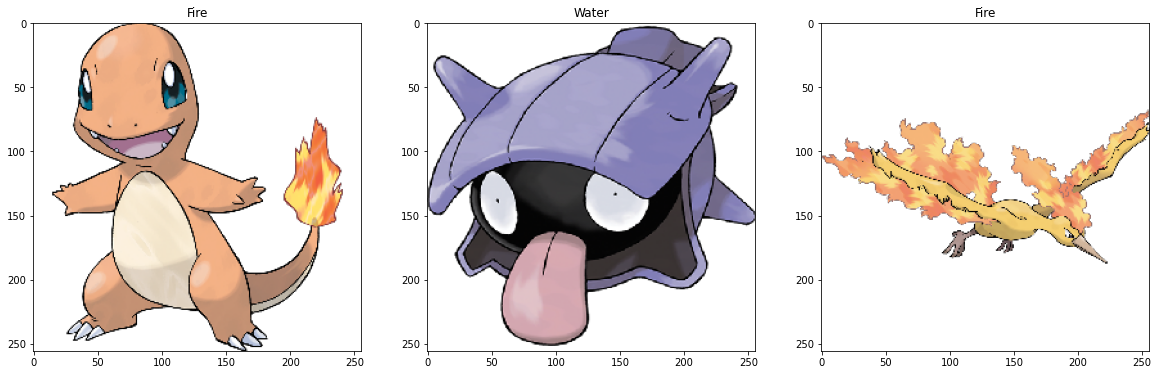

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [14]:
classification(y_test, prediction['category'], result)

Guardamos nuestro modelo

In [ ]:
model.save('modelo.h5')

En esta parte grafique el rendimiento del modelo durante la fase de entrenamiento para ver visualmente los valores de perdida y precisión por cada epoca.

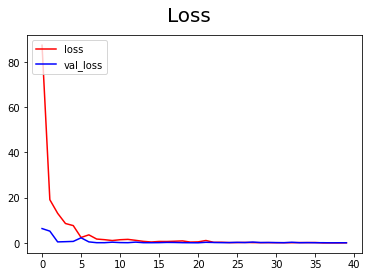

In [15]:
fig = plt.figure()
plt.plot(history.history['loss'], color='red', label='loss')
plt.plot(history.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

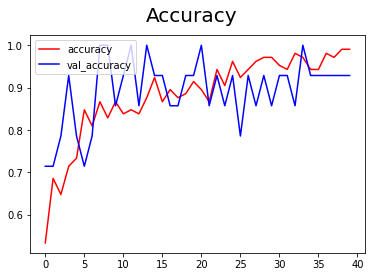

In [16]:
fig = plt.figure()
plt.plot(history.history['acc'], color='red', label='accuracy')
plt.plot(history.history['val_acc'], color='blue', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()